In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as cst
# Git path 
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
# Import plot functions
sys.path.append(git_path+"/pyplot-perso/")
from color_series1 import colors, mygradient
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure

In [16]:
reference_distance = 3 # Angstrom
reference_energy = 0.1 # Kcal/mol
reference_mass = 1 # g/mol
mass_kg = reference_mass/cst.kilo/cst.Avogadro # kg
epsilon_J = reference_distance*cst.calorie*cst.kilo/cst.Avogadro # J
sigma_m = reference_energy*cst.angstrom # m
time_s = np.sqrt(mass_kg*sigma_m**2/epsilon_J) # s
reference_time = time_s / cst.femto # fs
kB = cst.Boltzmann*cst.Avogadro/cst.calorie/cst.kilo # kCal/mol/K
reference_temperature = reference_energy/kB # K
pressure_pa = epsilon_J/sigma_m**3 # Pa
reference_pressure = pressure_pa/cst.atm # atm

In [25]:
pres_mdcode

array([0.99379769, 0.99916604, 0.99936837, 1.001038  ])

In [20]:
rho_mdcode = []
pres_mdcode = []
for temperature in [5, 50, 100, 150, 200]:
    path = "molecular-dynamics/mdcode-T"+str(temperature)+"K/density.dat"
    time, rho_vs_time = np.loadtxt(path).T
    rho = np.mean(rho_vs_time[20:])
    rho_mdcode.append(rho)
    path = "molecular-dynamics/mdcode-T"+str(temperature)+"K/pressure.dat"
    time, pres_vs_time = np.loadtxt(path).T
    pres = np.mean(pres_vs_time[20:])
    pres_mdcode.append(pres)
rho_mdcode = np.array(rho_mdcode)
pres_mdcode = np.array(pres_mdcode)

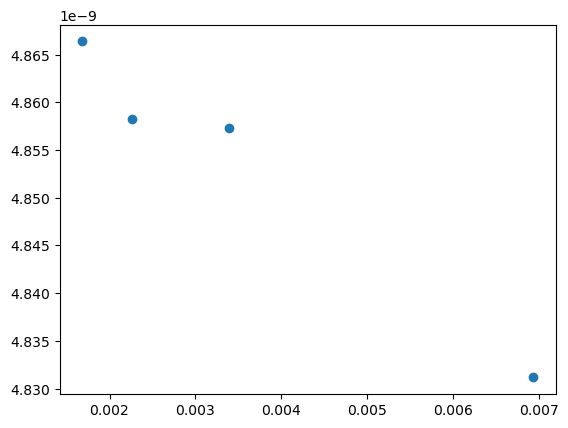

In [24]:
plt.plot(rho_mdcode / (reference_mass/reference_distance**3), pres_mdcode/reference_pressure, 'o')

In [4]:
DtoO, density, _ = np.loadtxt(git_path + "/analysis/classic2.0/density_vs_ratio.dat").T
density *= 1e-3 * 1e30 / 6.022e23
xDtoO, xH2O, xDOH, xD2O = np.loadtxt(git_path + "/literature/Scharlin1982/scharlin1982ACS.dat").T
xPa = 2*xH2O/(2*xH2O+xDOH)
xPa = xPa[:-1]

/tmp/ipykernel_65151/306665231.py:4: RuntimeWarning: invalid value encountered in divide
  xPa = 2*xH2O/(2*xH2O+xDOH)


In [6]:
1108 * (18/20)

997.2

In [13]:
density_H20_20C = 0.99827 # g/ml - Hare 86
density_D20_20C = 1.10536 # g/ml - Hare 86

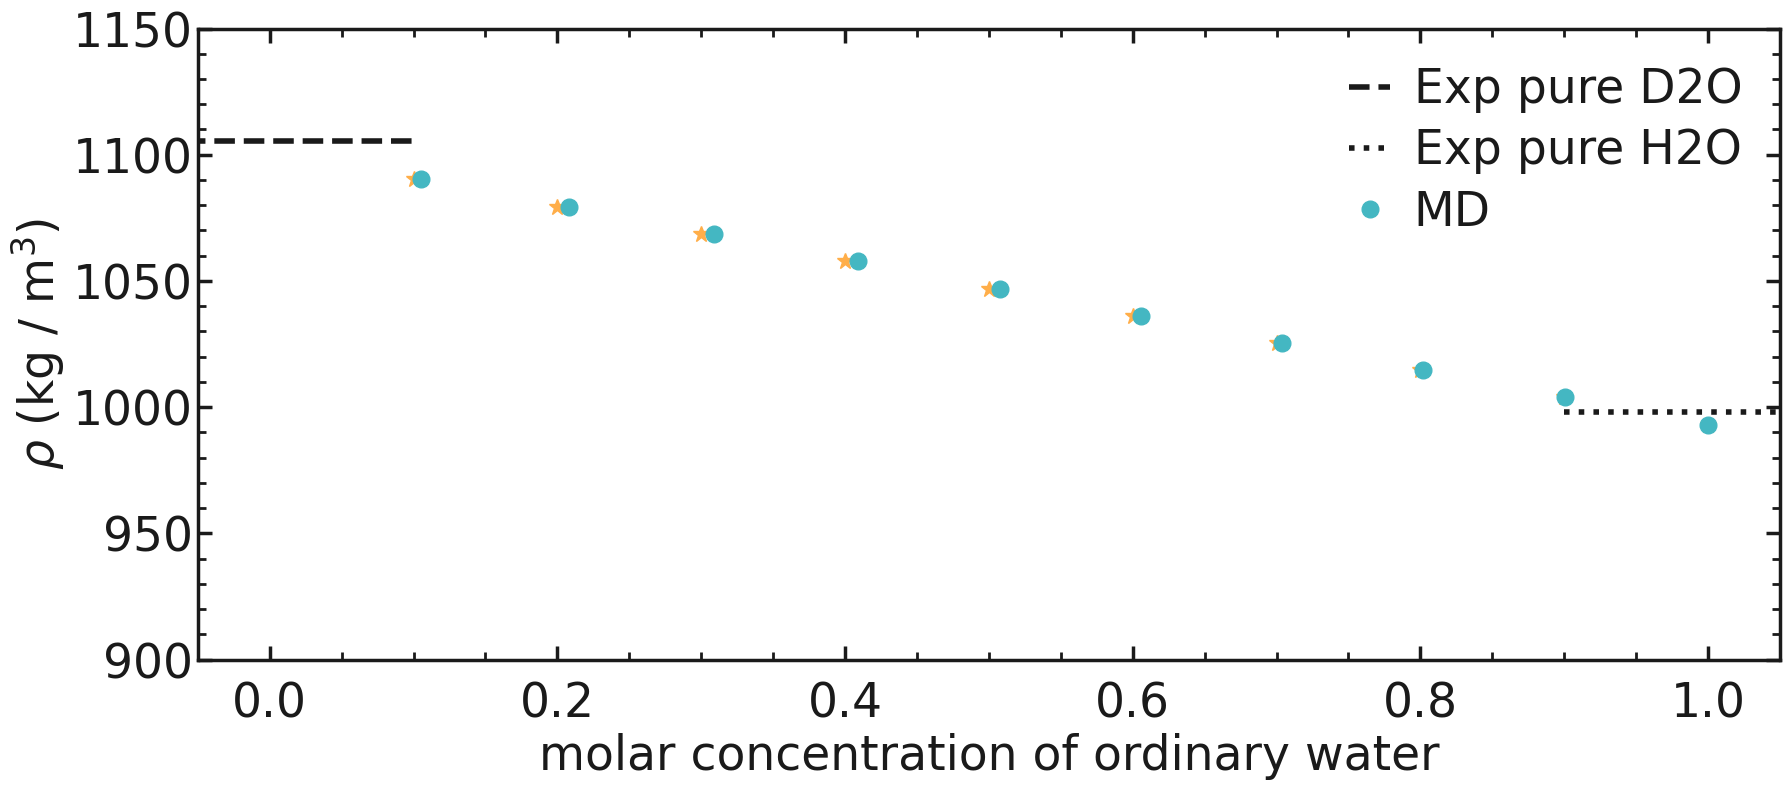

In [15]:
mode = 'light'
mygray = colors["mylightgray"]

fig = prepare_figure(mode, transparency = False, desired_figsize=(18,8))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))

x = np.linspace(-0.1, 0.1, 10)
ax[-1].plot(x, x*0+density_D20_20C*1000, '--', color=mygray,
        markersize = 12, linewidth=4, label="Exp pure D2O") 
x = np.linspace(0.9, 1.1, 10)
ax[-1].plot(x, x*0+density_H20_20C*1000, ':', color=mygray,
        markersize = 12, linewidth=4, label="Exp pure H2O") 
ax[-1].plot(1-DtoO, density, '*', color=colors["myorange"],
        markersize = 12, linewidth=4) 
ax[-1].plot(xPa, density, 'o', color=colors["mycyan"],
        markersize = 12, linewidth=4, label="MD") 
complete_panel(ax[-1], r'molar concentration of ordinary water',
                r'$\rho$ (kg / m$^3$)',
                legend=True, axis_color=mygray, xpad=15,
                locator_x=None, locator_y=None)
set_boundaries(plt, x_boundaries=(-0.05, 1.05), y_boundaries=(900, 1150))

save_figure(plt, fig, mode, git_path, "/figures/", "density-mixture", transparency = False)